# (2018-02-05) The Data Incubator Project Pre Analysis

In [2]:
import copy
import csv
import pandas as pd
import numpy as np
import scipy as scipy
from scipy.stats import pearsonr
import math
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import itertools
from copy import deepcopy
from collections import defaultdict
from datetime import datetime
pd.options.display.mpl_style = 'default'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading the CDC 500 Cities Data

In [3]:
fh_cities = pd.read_csv('./project/500_Cities__Local_Data_for_Better_Health__2017_release.csv')

In [4]:
for column in fh_cities.columns:
    print column

Year
StateAbbr
StateDesc
CityName
GeographicLevel
DataSource
Category
UniqueID
Measure
Data_Value_Unit
DataValueTypeID
Data_Value_Type
Data_Value
Low_Confidence_Limit
High_Confidence_Limit
Data_Value_Footnote_Symbol
Data_Value_Footnote
PopulationCount
GeoLocation
CategoryID
MeasureId
CityFIPS
TractFIPS
Short_Question_Text


In [5]:
fh_cities.describe()

/Users/oryoruk/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
count,810103.000000,789432.000000,789432.000000,789432.000000,8.099350e+05,8.100470e+05,7.820470e+05
mean,2014.716066,30.835291,29.096031,32.575900,3.203030e+04,2.606307e+06,2.592907e+10
std,0.450906,25.210650,24.671872,25.697762,2.568755e+06,1.686183e+06,1.675378e+10
min,2014.000000,0.200000,0.100000,0.300000,1.000000e+00,1.500300e+04,1.073000e+09
25%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.000000,95.500000,94.100000,96.500000,3.087455e+08,5.613900e+06,5.602100e+10


In [7]:
fh_cities.head(1)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.7,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance


In [9]:
set(fh_cities.Measure)

{'All teeth lost among adults aged >=65 Years',
 'Arthritis among adults aged >=18 Years',
 'Binge drinking among adults aged >=18 Years',
 'Cancer (excluding skin cancer) among adults aged >=18 Years',
 'Cholesterol screening among adults aged >=18 Years',
 'Chronic kidney disease among adults aged >=18 Years',
 'Chronic obstructive pulmonary disease among adults aged >=18 Years',
 'Coronary heart disease among adults aged >=18 Years',
 'Current asthma among adults aged >=18 Years',
 'Current lack of health insurance among adults aged 18\xe2\x80\x9364 Years',
 'Current smoking among adults aged >=18 Years',
 'Diagnosed diabetes among adults aged >=18 Years',
 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50\xe2\x80\x9375 Years',
 'High blood pressure among adults aged >=18 Years',
 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
 'Mammography use among women aged 50\xe2\x80\x9374 Years',
 'Mental health not good f

## Let's try to recapitulate the time zone hypothesis

In [15]:
set(fh_cities[fh_cities.CityName == "Amarillo"].StateAbbr)

{'TX'}

In [13]:
set(fh_cities[fh_cities.CityName == "Huntsville"].StateAbbr)

{'AL'}

In [19]:
set(fh_cities[fh_cities.CityName == "Amarillo"].Measure)

{'All teeth lost among adults aged >=65 Years',
 'Arthritis among adults aged >=18 Years',
 'Binge drinking among adults aged >=18 Years',
 'Cancer (excluding skin cancer) among adults aged >=18 Years',
 'Cholesterol screening among adults aged >=18 Years',
 'Chronic kidney disease among adults aged >=18 Years',
 'Chronic obstructive pulmonary disease among adults aged >=18 Years',
 'Coronary heart disease among adults aged >=18 Years',
 'Current asthma among adults aged >=18 Years',
 'Current lack of health insurance among adults aged 18\xe2\x80\x9364 Years',
 'Current smoking among adults aged >=18 Years',
 'Diagnosed diabetes among adults aged >=18 Years',
 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50\xe2\x80\x9375 Years',
 'High blood pressure among adults aged >=18 Years',
 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
 'Mammography use among women aged 50\xe2\x80\x9374 Years',
 'Mental health not good f

In [33]:
fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].ix[672630]

Year                                                                       2014
StateAbbr                                                                    TX
StateDesc                                                                 Texas
CityName                                                               Amarillo
GeographicLevel                                                            City
DataSource                                                                BRFSS
Category                                                    Unhealthy Behaviors
UniqueID                                                                4803000
Measure                       Sleeping less than 7 hours among adults aged >...
Data_Value_Unit                                                               %
DataValueTypeID                                                       AgeAdjPrv
Data_Value_Type                                         Age-adjusted prevalence
Data_Value                              

In [31]:
sum(fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].PopulationCount)

572085.0

In [10]:
fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].ix[672630].PopulationCount

190695.0

In [36]:
sum(fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].PopulationCount)/3

190695.0

In [13]:
fh_cities[(fh_cities.CityName == "Huntsville") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].ix[5351].PopulationCount

180105.0

In [38]:
sum(fh_cities[(fh_cities.CityName == "Huntsville") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].PopulationCount)/3

180105.0

city pop equals sum of tract pops for both cities

In [34]:
fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].ix[672630].Data_Value

32.899999999999999

In [40]:
fh_cities[(fh_cities.CityName == "Huntsville") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].ix[5351].Data_Value

39.700000000000003

In [19]:
fh_cities[(fh_cities.CityName == "Huntsville") & (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years')].ix[5351]

Year                                                                       2014
StateAbbr                                                                    AL
StateDesc                                                               Alabama
CityName                                                             Huntsville
GeographicLevel                                                            City
DataSource                                                                BRFSS
Category                                                    Unhealthy Behaviors
UniqueID                                                                0137000
Measure                       Sleeping less than 7 hours among adults aged >...
Data_Value_Unit                                                               %
DataValueTypeID                                                       AgeAdjPrv
Data_Value_Type                                         Age-adjusted prevalence
Data_Value                              

## yes, residents of Huntsville are sleeping less!

## let's visualize this

In [39]:
set(fh_cities.GeographicLevel)

{'Census Tract', 'City', 'US'}

In [174]:
#fh_cities[ ((fh_cities.CityName == "Amarillo")|(fh_cities.CityName == "Huntsville"))& (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years') & (fh_cities.GeographicLevel == 'Census Tract') ][['CityName','Data_Value']].boxplot(by='CityName')

In [69]:
amari_perc_less7 = list(fh_cities[ (fh_cities.CityName == "Amarillo")& (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years') & (fh_cities.GeographicLevel == 'Census Tract') ].Data_Value.dropna())
hunts_perc_less7 = list(fh_cities[ (fh_cities.CityName == "Huntsville")& (fh_cities.Measure == 'Sleeping less than 7 hours among adults aged >=18 Years') & (fh_cities.GeographicLevel == 'Census Tract') ].Data_Value.dropna())

In [76]:
print "Wilcoxon Rank-Sum Test P-value: " , scipy.stats.ranksums(amari_perc_less7,hunts_perc_less7 )[1]

Wilcoxon Rank-Sum Test P-value:  1.44859643542e-07


In [167]:
pd.options.display.mpl_style = 'default'

plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.dpi'] = 125

## plot 1

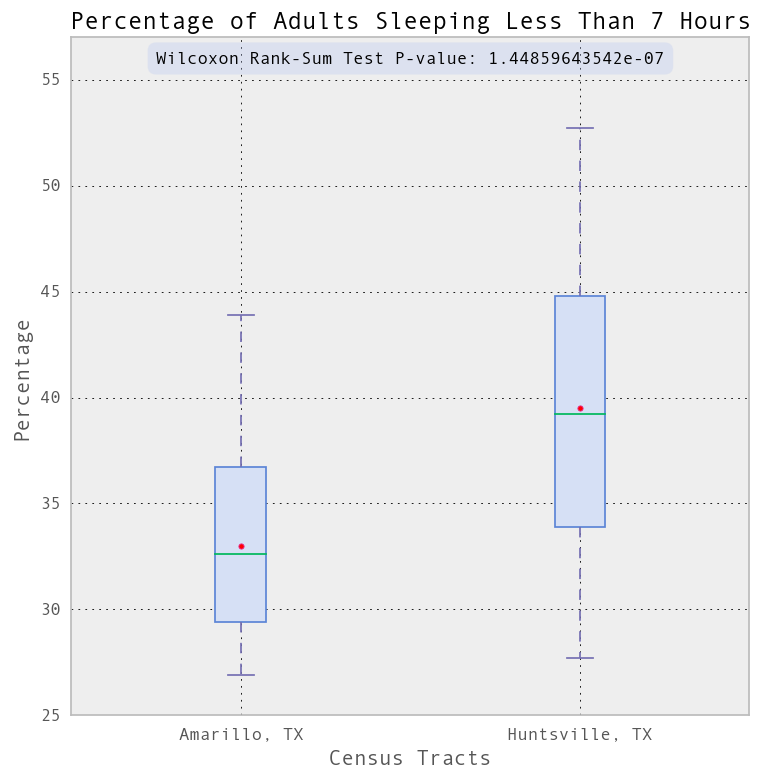

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot([amari_perc_less7, hunts_perc_less7], labels=['Amarillo, TX', 'Huntsville, TX'], showmeans=True, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    #box.set( color='#5C85D6', linewidth=3)
    box.set( color='#5C85D6')

    # change fill color
    box.set( facecolor = '#D6E0F5' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    #whisker.set(color='#7570b3', linewidth=3)
    whisker.set(color='#7570b3')


## change color and linewidth of the caps
for cap in bp['caps']:
    #cap.set(color='#7570b3', linewidth=3)
    cap.set(color='#7570b3')


## change color and linewidth of the medians
for median in bp['medians']:
    #median.set(color='#00B85C', linewidth=3)
    median.set(color='#00B85C')


## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#800000', alpha=0.02)

for flier in bp['means']:
    flier.set(marker='.', color='#e7298a', alpha=1)

    
plt.title('Percentage of Adults Sleeping Less Than 7 Hours', fontsize = 14)
ax.set_ylabel('Percentage', fontsize=12)

ax.set_xlabel('Census Tracts', fontsize=12)

ax.set_ylim((25,57))
    
ax.text(1.5, 56, "Wilcoxon Rank-Sum Test P-value: " + str(scipy.stats.ranksums(amari_perc_less7,hunts_perc_less7 )[1]), ha="center", va="center",style='italic', bbox=dict(boxstyle='round', facecolor='#b5c4f3', alpha=0.3, pad=0.5), fontsize=10,horizontalalignment='right')

In [169]:
amari_no_leisure = list(fh_cities[ (fh_cities.CityName == "Amarillo")& (fh_cities.Measure == 'No leisure-time physical activity among adults aged >=18 Years') & (fh_cities.GeographicLevel == 'Census Tract') ].Data_Value.dropna())
hunts_no_leisure = list(fh_cities[ (fh_cities.CityName == "Huntsville")& (fh_cities.Measure == 'No leisure-time physical activity among adults aged >=18 Years') & (fh_cities.GeographicLevel == 'Census Tract') ].Data_Value.dropna())

## plot 2

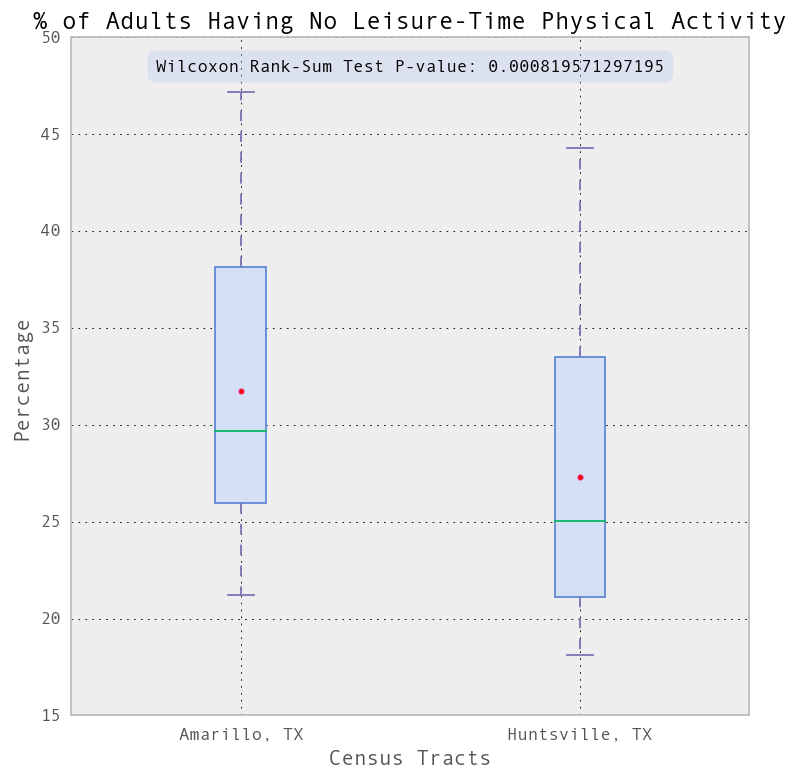

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot([amari_no_leisure, hunts_no_leisure], labels=['Amarillo, TX', 'Huntsville, TX'], showmeans=True, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    #box.set( color='#5C85D6', linewidth=3)
    box.set( color='#5C85D6')

    # change fill color
    box.set( facecolor = '#D6E0F5' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    #whisker.set(color='#7570b3', linewidth=3)
    whisker.set(color='#7570b3')


## change color and linewidth of the caps
for cap in bp['caps']:
    #cap.set(color='#7570b3', linewidth=3)
    cap.set(color='#7570b3')


## change color and linewidth of the medians
for median in bp['medians']:
    #median.set(color='#00B85C', linewidth=3)
    median.set(color='#00B85C')


## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#800000', alpha=0.02)

for flier in bp['means']:
    flier.set(marker='.', color='#e7298a', alpha=1)

    
plt.title('% of Adults Having No Leisure-Time Physical Activity', fontsize = 14)
ax.set_ylabel('Percentage', fontsize=12)

ax.set_xlabel('Census Tracts', fontsize=12)

#ax.set_ylim((25,57))
    
ax.text(1.5, 48.5, "Wilcoxon Rank-Sum Test P-value: " + str(scipy.stats.ranksums(amari_no_leisure,hunts_no_leisure )[1]), ha="center", va="center",style='italic', bbox=dict(boxstyle='round', facecolor='#b5c4f3', alpha=0.3, pad=0.5), fontsize=10,horizontalalignment='right')

## how about other behavioral patterns, preventative measures and instance heath outcomes

In [24]:
set(fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.CityFIPS == 4803000.0)].Measure)

{'All teeth lost among adults aged >=65 Years',
 'Arthritis among adults aged >=18 Years',
 'Binge drinking among adults aged >=18 Years',
 'Cancer (excluding skin cancer) among adults aged >=18 Years',
 'Cholesterol screening among adults aged >=18 Years',
 'Chronic kidney disease among adults aged >=18 Years',
 'Chronic obstructive pulmonary disease among adults aged >=18 Years',
 'Coronary heart disease among adults aged >=18 Years',
 'Current asthma among adults aged >=18 Years',
 'Current lack of health insurance among adults aged 18\xe2\x80\x9364 Years',
 'Current smoking among adults aged >=18 Years',
 'Diagnosed diabetes among adults aged >=18 Years',
 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50\xe2\x80\x9375 Years',
 'High blood pressure among adults aged >=18 Years',
 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
 'Mammography use among women aged 50\xe2\x80\x9374 Years',
 'Mental health not good f

In [171]:
#fh_cities[(fh_cities.CityName == "Huntsville") & (fh_cities.GeographicLevel == 'City') & (fh_cities.DataValueTypeID == 'AgeAdjPrv')]

In [172]:
#fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.GeographicLevel == 'City') & (fh_cities.DataValueTypeID == 'AgeAdjPrv')].Data_Value

In [173]:
for measure in set(fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.CityFIPS == 4803000.0)].Measure):
    print measure
    print "_"*79
    print "in Amarillo, TX: ", fh_cities[(fh_cities.CityName == "Amarillo") & (fh_cities.GeographicLevel == 'City') & (fh_cities.DataValueTypeID == 'AgeAdjPrv') & (fh_cities.Measure == measure)].Data_Value.values[0]
    print "in Huntsville, TX: ",  fh_cities[(fh_cities.CityName == "Huntsville") & (fh_cities.GeographicLevel == 'City') & (fh_cities.DataValueTypeID == 'AgeAdjPrv') & (fh_cities.Measure == measure)].Data_Value.values[0]
    print "Wilcoxon Rank-Sum Test P-value: " , scipy.stats.ranksums(list(fh_cities[ (fh_cities.CityName == "Amarillo")& (fh_cities.Measure == measure) & (fh_cities.GeographicLevel == 'Census Tract') ].Data_Value.dropna()), 
                                                                list(fh_cities[ (fh_cities.CityName == "Huntsville")& (fh_cities.Measure == measure) & (fh_cities.GeographicLevel == 'Census Tract') ].Data_Value.dropna()) )[1]
    print
    print

Visits to dentist or dental clinic among adults aged >=18 Years
_______________________________________________________________________________
in Amarillo, TX:  57.1
in Huntsville, TX:  60.5
Wilcoxon Rank-Sum Test P-value:  0.0934725402089


Chronic kidney disease among adults aged >=18 Years
_______________________________________________________________________________
in Amarillo, TX:  2.8
in Huntsville, TX:  2.7
Wilcoxon Rank-Sum Test P-value:  0.561791909863


Sleeping less than 7 hours among adults aged >=18 Years
_______________________________________________________________________________
in Amarillo, TX:  32.9
in Huntsville, TX:  39.7
Wilcoxon Rank-Sum Test P-value:  1.44859643542e-07


No leisure-time physical activity among adults aged >=18 Years
_______________________________________________________________________________
in Amarillo, TX:  31.5
in Huntsville, TX:  27.0
Wilcoxon Rank-Sum Test P-value:  0.000819571297195


Papanicolaou smear use among adult women aged 21

### 'High blood pressure among adults aged >=18 Years' and 'Binge drinking among adults aged >=18 Years' seem to be significantly different between these 2 towns also